In [1]:
## Import relevant libraries
import sys
sys.path.append('../../activedrops')
import pivdrops
import viz
pivdrops.set_plotting_style()

Let's first plot the image in bits. We are dealing with 16-bit images, which means that 2**16 is the maximum value for each pixel. We will plot the image in bits to see how the values are distributed.

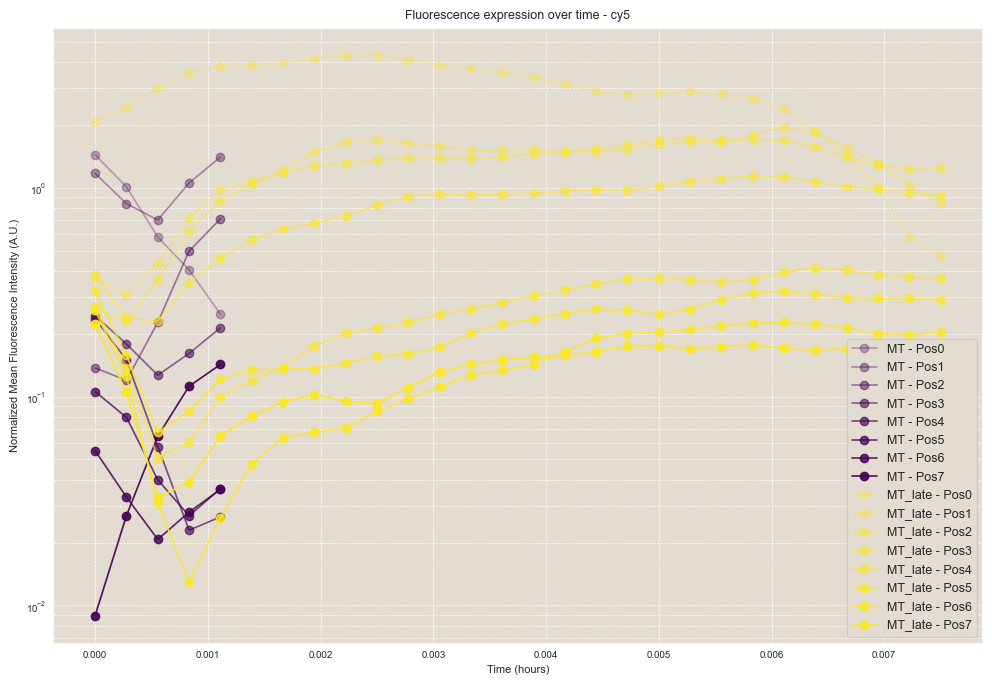

In [3]:
# Example usage
data_path = "../../data/MTs_mVenus-calibration/"
conditions = ["MT", "MT_late"]
subconditions = ["Pos0", "Pos1", "Pos2", "Pos3", "Pos4", "Pos5", "Pos6", "Pos7"]
min_frame = 0
max_frame = None



# Call the function with the updated parameters
df_cy5 = viz.plot_mean_fluorescence_over_time(
    data_path=data_path,
    conditions=conditions,
    subconditions=subconditions,
    channel="cy5",
    time_interval=1,  
    min_frame=0,
    max_frame=None,
    skip_frames=1,
    log_scale=True  # Set log_scale to True
)


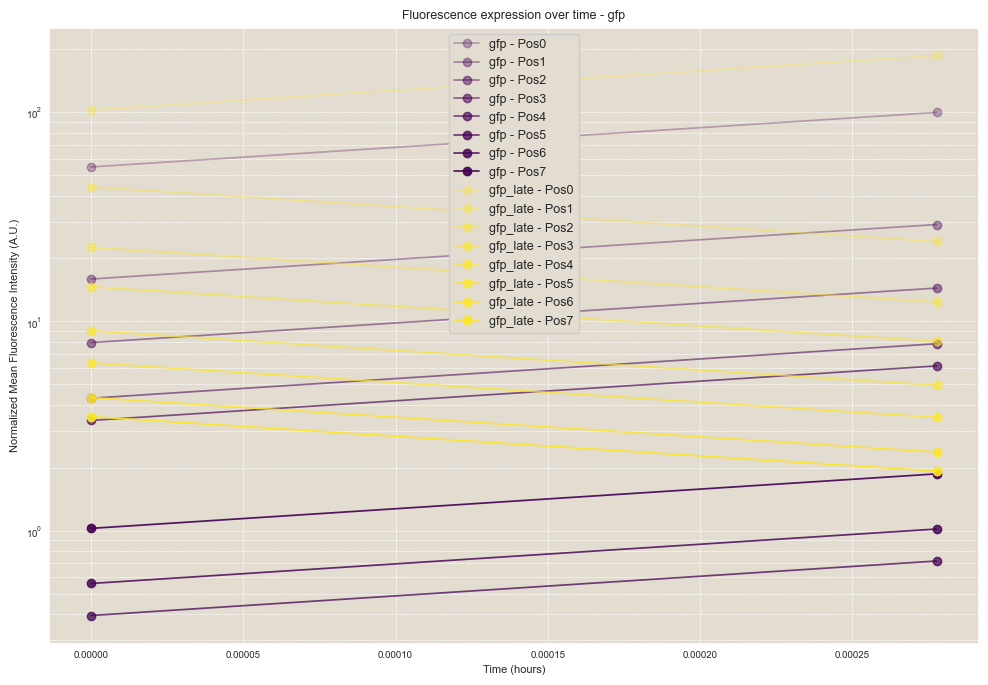

In [16]:
# Example usage
data_path = "../../data/MTs_mVenus-calibration/"
conditions = ["gfp", "gfp_late"]
subconditions = ["Pos0", "Pos1", "Pos2", "Pos3", "Pos4", "Pos5", "Pos6", "Pos7"]
min_frame = 0
max_frame = None



# Call the function with the updated parameters
viz.plot_mean_fluorescence_over_time(
    data_path=data_path,
    conditions=conditions,
    subconditions=subconditions,
    channel="gfp",
    time_interval=1,  
    min_frame=0,
    max_frame=2,
    skip_frames=1,
    log_scale=True  # Set log_scale to True
)


In [ ]:
df_cy5 = viz.fluorescence_heatmap(
    data_path=data_path,
    conditions=conditions,
    subconditions=subconditions,
    channel="cy5",
    time_interval=1,  
    min_frame=0,
    max_frame=None,
    skip_frames=1,
    log_scale=True  # Set log_scale to True
)

Now let's convert fluorescence intensity to µM (microtubules) and µg/ml (microtubules).

In [ ]:
def collect_fluorescence_data(data_path, conditions, subconditions, channel, time_interval=3, min_frame=0, max_frame=None, skip_frames=1):
    """
    Collects and returns a DataFrame containing the mean fluorescence intensity over time for a given set of images across multiple conditions and subconditions.

    Parameters:
    - data_path (str): Base path where the images are stored.
    - conditions (list of str): List of condition names.
    - subconditions (list of str): List of subcondition names.
    - channel (str): Channel name.
    - time_interval (int): Time interval between frames in minutes.
    - min_frame (int): Minimum frame number to process.
    - max_frame (int): Maximum frame number to process.
    - skip_frames (int): Number of frames to skip between plotted points.

    Returns:
    - pd.DataFrame: Data containing columns for condition, subcondition, frame (in hours), and mean_intensity.
    """
    all_data = []

    for condition in conditions:
        for subcondition in subconditions:
            directory_path = os.path.join(data_path, condition, subcondition)
            image_files = sorted(glob.glob(os.path.join(directory_path, "*.tif")))[min_frame:max_frame:skip_frames]
            
            for i, image_file in enumerate(image_files):
                img = imageio.imread(image_file)
                mean_intensity = np.mean(img) 
                frame_time = (i * skip_frames * time_interval) / 60.0  # Convert to hours

                # Append data for this image to the list
                all_data.append({
                    "condition": condition,
                    "subcondition": subcondition,
                    "time (min)": frame_time,
                    "mean_intensity": mean_intensity 
                })

    # Convert the compiled data into a DataFrame
    results_df = pd.DataFrame(all_data)

    # Optionally, you could apply smoothing here to the 'mean_intensity' across frames for each condition/subcondition combo
    # This would require a bit more complex grouping and application of the smoothing function.

    return results_df

# Assuming the collect_fluorescence_data function is defined as provided above


In [ ]:

# Example usage parameters
data_path = "../../data/MTs_mVenus-calibration/"
conditions = ["MT"]
subconditions = ["Pos0", "Pos1", "Pos2", "Pos3", "Pos4", "Pos5", "Pos6", "Pos7"]
channel = "cy5"  # Specify the channel as required by the new function
time_interval = 1  # Time interval in minutes
min_frame = 0
max_frame = 1  # Adjust according to your needs
skip_frames = 1  # How many frames to skip between plotted points

# Call the new function to collect fluorescence data
df = collect_fluorescence_data(
    data_path=data_path,
    conditions=conditions,
    subconditions=subconditions,
    channel=channel,
    time_interval=time_interval,
    min_frame=min_frame,
    max_frame=max_frame,
    skip_frames=skip_frames
)

df.head()

In [ ]:
import numpy as np
from scipy.stats import linregress
import pandas as pd

i=80

# Assign concentrations to subconditions
concentration_mapping = {
    "Pos0": i,
    "Pos1": i/2,
    "Pos2": i/4,
    "Pos3": i/8,
    "Pos4": i/16,
    "Pos5": i/32,
    "Pos6": i/64,
    "Pos7": i/128,
}


# Map each subcondition in df to its concentration
df['concentration µM'] = df['subcondition'].map(concentration_mapping)

# Calculate average intensity for each concentration
average_intensity_per_concentration = df.groupby('concentration µM')['mean_intensity'].mean().reset_index()

# Now let's fit a linear model (calibration curve) to these averages
slope, intercept, r_value, p_value, std_err = linregress(average_intensity_per_concentration['concentration µM'],
                                                          average_intensity_per_concentration['mean_intensity'])

# The line equation is y = mx + c, where m is the slope and c is the intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
print(f"Line Equation: {line_eq}")
print(f"R-squared: {r_value**2:.2f}")
df.head()

In [ ]:
# Example usage parameters
data_path = "../../data/MTs_mVenus-calibration/"
conditions = ["gfp"]
subconditions = ["Pos0", "Pos1", "Pos2", "Pos3", "Pos4", "Pos5", "Pos6", "Pos7"]
channel = "gfp"  # Specify the channel as required by the new function
time_interval = 1  # Time interval in minutes
min_frame = 0
max_frame = 1  # Adjust according to your needs
skip_frames = 1  # How many frames to skip between plotted points

# Call the new function to collect fluorescence data
df = collect_fluorescence_data(
    data_path=data_path,
    conditions=conditions,
    subconditions=subconditions,
    channel=channel,
    time_interval=time_interval,
    min_frame=min_frame,
    max_frame=max_frame,
    skip_frames=skip_frames
)

df.head()

In [ ]:
import numpy as np
from scipy.stats import linregress
import pandas as pd

i = 630/2

# Assign concentrations to subconditions
concentration_mapping = {
    "Pos0": i,
    "Pos1": i/2,
    "Pos2": i/4,
    "Pos3": i/8,
    "Pos4": i/16,
    "Pos5": i/32,
    "Pos6": i/64,
    "Pos7": i/128,
}

# Map each subcondition in df to its concentration
df['concentration µg/ml'] = df['subcondition'].map(concentration_mapping)

# Calculate average intensity for each concentration
average_intensity_per_concentration = df.groupby('concentration µg/ml')['mean_intensity'].mean().reset_index()

# Now let's fit a linear model (calibration curve) to these averages
slope, intercept, r_value, p_value, std_err = linregress(average_intensity_per_concentration['concentration µg/ml'],
                                                          average_intensity_per_concentration['mean_intensity'])

# The line equation is y = mx + c, where m is the slope and c is the intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
print(f"Line Equation: {line_eq}")
print(f"R-squared: {r_value**2:.2f}")
df.head()

Now that we have our linear regression, we can use it to convert the fluorescence intensity to µM (microtubules) and µg/ml (microtubules).

In [ ]:
# Example usage
data_path = "../../data/MTs_mVenus-calibration/"
conditions = ["MT", "MT_late"]
subconditions = ["Pos0", "Pos1", "Pos2", "Pos3", "Pos4", "Pos5", "Pos6", "Pos7"]
min_frame = 0
max_frame = None



# Call the function with the updated parameters
df_cy5 = viz.plot_mean_fluorescence_over_time(
    data_path=data_path,
    conditions=conditions,
    subconditions=subconditions,
    channel="cy5",
    time_interval=1,  
    min_frame=0,
    max_frame=5,
    skip_frames=1,
    log_scale=False  # Set log_scale to True
)


In [ ]:
# Example usage
data_path = "../../data/MTs_mVenus-calibration/"
conditions = ["gfp", "gfp_late"]
subconditions = ["Pos0", "Pos1", "Pos2", "Pos3", "Pos4", "Pos5", "Pos6", "Pos7"]
min_frame = 0
max_frame = None



# Call the function with the updated parameters
df_cy5 = plot_mean_fluorescence_over_time(
    data_path=data_path,
    conditions=conditions,
    subconditions=subconditions,
    channel="gfp",
    time_interval=1,  
    min_frame=0,
    max_frame=5,
    skip_frames=1,
    log_scale=False  # Set log_scale to True
)


Great, now we have functions to plot our data in the right units. Lastly, let's got through the function to generate movies.

In [ ]:
# def fluorescence_heatmap(data_path, condition, subcondition, channel, time_interval=3, min_frame=0, max_frame=None, vmax=None, skip_frames=1):
#     """
#     Reads each image as a matrix, creates and saves a heatmap representing the normalized pixel-wise fluorescence intensity.

#     Args:
#     - data_path (str): Base directory where the images are stored.
#     - condition (str): Condition defining a subdirectory within the data path.
#     - subcondition (str): Subcondition defining a further subdirectory.
#     - channel (str): Channel specifying the fluorescence ('cy5' or 'gfp').
#     - time_interval (int): Time interval in seconds between frames.
#     - min_frame (int): Minimum frame number to start processing from.
#     - max_frame (int, optional): Maximum frame number to stop processing at.
#     """
#     # Determine the directory paths based on the channel
#     input_directory_path = os.path.join(data_path, condition, subcondition)
#     output_directory_path = os.path.join(data_path, condition, subcondition, "intensity_heatmap")
    
#     # Create the output directory if it doesn't exist
#     if not os.path.exists(output_directory_path):
#         os.makedirs(output_directory_path)

#     # Get all .tif files in the folder
#     image_files = sorted(glob.glob(os.path.join(input_directory_path, "*.tif")))[min_frame:max_frame:skip_frames] 
    
#     # Loop through each image file and create a heatmap
#     for i, image_file in enumerate(image_files, start=min_frame):
#         # Read the image into a numpy array
#         intensity_matrix = imageio.imread(image_file) 

#         # Plot the heatmap
#         fig, ax = plt.subplots(figsize=(8, 8))
#         im = ax.imshow(intensity_matrix, cmap='gray', interpolation='nearest', extent=[-2762/2, 2762/2, -2762/2, 2762/2], vmin=0, vmax=vmax)
#         plt.colorbar(im, ax=ax, label='Normalized Fluorescence Intensity (A.U.)')
#         plt.title(f"Time (min): {(i - min_frame) * time_interval / 60:.2f}. \n{condition} - {subcondition} - {channel}")
#         plt.xlabel('x [µm]')
#         plt.ylabel('y [µm]')
        
#         # Save the heatmap
#         heatmap_filename = f"heatmap_frame_{i}.tif"
#         heatmap_path = os.path.join(output_directory_path, heatmap_filename)
#         plt.savefig(heatmap_path, bbox_inches='tight', pad_inches=0.1, dpi=300)
#         plt.close(fig)  # Close the figure to free memory
 

In [ ]:
# def create_movies(data_path, condition, subcondition, channel, frame_rate=30, max_frame=None):
#     """
#     Creates video files from processed and annotated images stored in a specified directory.

#     Args:
#     - data_path (str): Base path where the annotated images are stored.
#     - condition (str): Condition under which the annotated images are stored.
#     - subcondition (str): Subcondition under which the annotated images are stored.
#     - channel (str): The specific channel being processed ('cy5' or 'gfp').
#     - frame_rate (int, optional): Frame rate for the output video. Defaults to 30.
#     - max_frame (int, optional): Maximum number of frames to be included in the video. If None, all frames are included.
#     """


#     images_dir = os.path.join(data_path, condition, subcondition, "intensity_heatmap")

#     image_files = natsorted(glob.glob(os.path.join(images_dir, "*.tif")))

#     if max_frame is not None:
#         image_files = image_files[:max_frame]

#     if not image_files:
#         print("No images found for video creation.")
#         return

#     # Get the resolution of the first image (assuming all images are the same size)
#     first_image = cv2.imread(image_files[0])
#     video_resolution = (first_image.shape[1], first_image.shape[0])  # Width x Height

#     # Define the codec and create VideoWriter object
#     fourcc = cv2.VideoWriter_fourcc(*'MJPG')
#     out_path = os.path.join(data_path, condition, subcondition, f"{condition}_{subcondition}.avi")
#     out = cv2.VideoWriter(out_path, fourcc, frame_rate, video_resolution)

#     for file_path in image_files:
#         img = cv2.imread(file_path)
#         out.write(img)  # Write the image frame to the video

#     out.release()
#     print(f"Video saved to {out_path}")


In [ ]:
# def process_all_conditions_and_subconditions(data_path, conditions, subconditions, channel, time_interval, skip_frames, vmax, frame_rate):
#     """
#     Wrapper function to create heatmaps and movies for all combinations of conditions and subconditions.

#     Args:
#     - data_path (str): Base directory where the images are stored.
#     - conditions (list of str): List of condition names.
#     - subconditions (list of str): List of subcondition names.
#     - channel (str): Channel specifying the fluorescence ('cy5' or 'gfp').
#     - time_interval (int): Time interval in seconds between frames for heatmap.
#     - skip_frames (int): Number of frames to skip between each processed frame for heatmap.
#     - vmax (int): Maximum value for normalization in the heatmap.
#     - frame_rate (int): Frame rate for the output video.
#     """
#     for condition in conditions:
#         for subcondition in subconditions:
#             # Create heatmaps for each condition and subcondition
#             fluorescence_heatmap(
#                 data_path=data_path,
#                 condition=condition,
#                 subcondition=subcondition,
#                 channel=channel,
#                 time_interval=time_interval,
#                 min_frame=min_frame,
#                 max_frame=max_frame,
#                 vmax=vmax,
#                 skip_frames=skip_frames
#             )
            
#             # Create annotated image movies for each condition and subcondition
#             create_movies(
#                 data_path=data_path,
#                 condition=condition,
#                 subcondition=subcondition,
#                 channel=channel,
#                 frame_rate=frame_rate,
#                 max_frame=max_frame
#             )


In [ ]:

# Example usage
data_path = "../../data/MTs_mVenus-calibration/"
conditions = ["MT", "MT_late"]
subconditions = ["Pos0", "Pos1", "Pos2", "Pos3", "Pos4", "Pos5", "Pos6", "Pos7"]
min_frame = 0
max_frame = None

viz.process_all_conditions_and_subconditions(
    data_path=data_path,
    conditions=conditions,
    subconditions=subconditions,
    channel="cy5",
    time_interval=60,  # Adjust as needed
    skip_frames=1,
    vmax=2**13,  # Adjust as needed
    frame_rate=120,  # Adjust as needed
    min_frame=0,
    max_frame=5
)


In [ ]:

# Example usage
data_path = "../../data/MTs_mVenus-calibration/"
conditions = ["MT", "MT_late"]
subconditions = ["Pos0", "Pos1", "Pos2", "Pos3", "Pos4", "Pos5", "Pos6", "Pos7"]
min_frame = 0
max_frame = None

viz.process_all_conditions_and_subconditions(
    data_path=data_path,
    conditions=conditions,
    subconditions=subconditions,
    channel="gfp",
    time_interval=60,  # Adjust as needed
    skip_frames=1,
    vmax=2**13,  # Adjust as needed
    frame_rate=120,  # Adjust as needed
    min_frame=0,
    max_frame=5
)
